# TLDR: Macro Avg. F1 = 33% (5 Classes)
# TLDR: Macro Avg. F1 = 73% (2 Classes)

# Default Setup

In [1]:
# Dataloading Stuff
from google.colab import drive
from sys import path
import os

# Standard Stuff
!pip3 install numpy sklearn iterative-stratification pandas pyss3
from sklearn.model_selection import train_test_split

from pyss3 import SS3
from pyss3.util import Dataset, Evaluation, span

import numpy as np
import pandas as pd

drive.mount('/content/drive', force_remount=True)
path_root = '/content/drive/My Drive/NLP Lab/SingleLabel/'
path.append(path_root)
data_root = 'data/'

     |████████████████████████████████| 2.0MB 10.3MB/s 
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Load Data

In [2]:
df = pd.read_csv(path_root + data_root + "AmazonAlexaReview/amazon_alexa.tsv", sep="\t")
text = df['verified_reviews'].to_list()
labels = df['rating'].astype(str).to_list()

X_train, X_val, y_train, y_val = train_test_split(text, labels, test_size=0.2)

## Classification for 5 Classes

Classification: 100%|██████████| 630/630 [00:00<00:00, 51231.37it/s]



              precision    recall  f1-score   support

           1       0.28      0.35      0.31        31
           2       0.09      0.22      0.13        18
           3       0.20      0.28      0.23        32
           4       0.23      0.43      0.30        97
           5       0.83      0.58      0.68       452

    accuracy                           0.52       630
   macro avg       0.32      0.37      0.33       630
weighted avg       0.66      0.52      0.57       630


 Accuracy: 0.522

[ updating evaluations cache ]


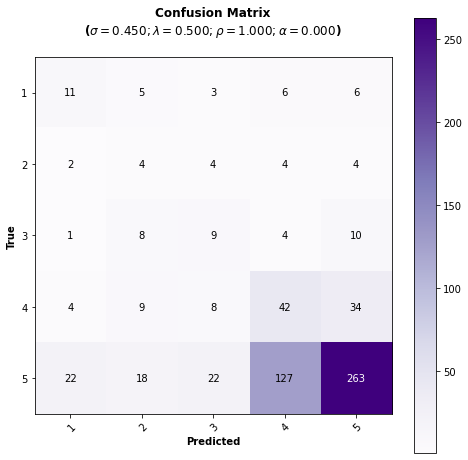

0.33073316906475847

In [3]:
clf = SS3()
clf.fit(X_train, y_train)
Evaluation.test(clf, X_val, y_val, metric="f1-score")

# Classification with 2 Classes
Here we map the values 1-3 to negative and the values 4,5 to positive.

Classification: 100%|██████████| 630/630 [00:00<00:00, 54260.08it/s]



              precision    recall  f1-score   support

    negative       0.46      0.76      0.57        82
    positive       0.96      0.86      0.91       548

    accuracy                           0.85       630
   macro avg       0.71      0.81      0.74       630
weighted avg       0.89      0.85      0.87       630


 Accuracy: 0.851

[ updating evaluations cache ]


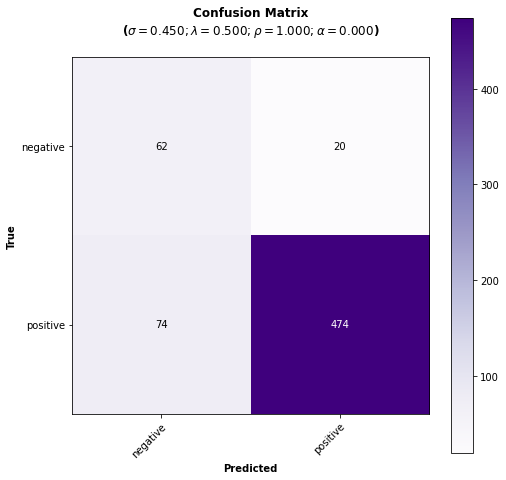

0.7392981035059607

In [4]:
new_labels = df['rating'].astype(str).replace(to_replace={'1': 'negative', '2': 'negative', '3': 'negative', '4': 'positive', '5': 'positive'}, regex=True).to_list()

X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(text, new_labels, test_size=0.2)
clf = SS3()
clf.fit(X_train_2, y_train_2)
Evaluation.clear_cache()
Evaluation.test(clf, X_val_2, y_val_2, metric="f1-score")